In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [2]:
pkl_path = '/users/paulchung/Dropbox (Personal)/Paul Working Folder/home/coding/metis/github_backup/Project-2-Regression/Pickles/'

In [3]:
# old_header_qb_df stats does not include ESPN's proprietary QBR calculation
master_raw_df = pd.read_pickle(pkl_path + 'master_raw_df.pkl')
added_qb_df = pd.read_pickle(pkl_path + 'added_players_df.pkl')
old_header_qb_df = pd.read_pickle(pkl_path + 'old_players_df.pkl')

In [4]:
master_raw_df.head()

,name,Year,Age,Tm,Pos,No.,G,GS,QBrec,Cmp,...,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,AV
0,Peyton Manning,1998,22,IND,QB,18,16,16,3-13-0,326,...,71.2,,22,109,6.08,4.84,3.7,1,1,11
1,Peyton Manning,1999,23,IND,QB,18,16,16,13-3-0,331,...,90.7,,14,116,7.35,7.06,2.6,6,7,18
2,Peyton Manning,2000,24,IND,QB,18,16,16,10-6-0,357,...,94.7,,20,131,7.25,7.22,3.4,2,3,18
3,Peyton Manning,2001,25,IND,QB,18,16,16,6-10-0,343,...,84.1,,29,232,6.77,5.88,5.0,,,15
4,Peyton Manning,2002,26,IND,QB,18,16,16,10-6-0,392,...,88.8,,23,145,6.60,6.09,3.7,4,5,14


In [5]:
master_raw_df.columns

Index(['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'NY/A', 'ANY/A',
       'Sk%', '4QC', 'GWD', 'AV'],
      dtype='object')

In [6]:
old_header_qb_df.columns = ['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Pass_Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk_Yds', 'NY/A', 'ANY/A',
       'Sk%', '4QC', 'GWD', 'AV']

In [7]:
master_raw_df.columns = ['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Pass_Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Sk_Yds', 'NY/A', 'ANY/A',
       'Sk%', '4QC', 'GWD', 'AV']

In [8]:
master_raw_df.head().columns

Index(['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Pass_Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Sk_Yds', 'NY/A',
       'ANY/A', 'Sk%', '4QC', 'GWD', 'AV'],
      dtype='object')

In [9]:
old_header_qb_df.head().columns

Index(['name', 'Year', 'Age', 'Tm', 'Pos', 'No.', 'G', 'GS', 'QBrec', 'Cmp',
       'Att', 'Cmp%', 'Pass_Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk_Yds', 'NY/A', 'ANY/A',
       'Sk%', '4QC', 'GWD', 'AV'],
      dtype='object')

In [10]:
master_raw_df[['Win','Loss','Draw']] = master_raw_df['QBrec'].str.split('-',expand=True)
old_header_qb_df[['Win','Loss','Draw']] = old_header_qb_df['QBrec'].str.split('-',expand=True)

In [11]:
sel_stats = ['name', 'Year', 'Age', 'Tm', 'G', 'GS', 'Win','Loss', 'Cmp', 'TD%', 'Int%', 'Rate','Att', 'Pass_Yds', 'TD', 'Int', 'Sk']
sel_stat_df = master_raw_df[sel_stats]
sel_stat_old_df = old_header_qb_df[sel_stats]

In [12]:
comb_df_sel_stats = sel_stat_df.append(sel_stat_old_df)

In [13]:
comb_df_sel_stats.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
count,1271,1271.000000,1271,1271,1271,1271,1271,1030,1271,1271,1271,1271,1271,1271,1271,1271,1271
unique,152,NaN,24,38,18,18,18,15,393,99,100,565,531,1024,50,31,62
top,Josh McCown,NaN,25,CHI,16,16,,5,0,0.0,0.0,,0,0,0,0,0
freq,34,NaN,121,70,334,297,241,129,65,158,142,56,56,66,214,198,150
mean,NaN,2006.397325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.975046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Issues
- how do some guys have 18 games/started?


In [14]:
num_cols = ['Age', 'G', 'GS', 'Cmp', 'Att', 'Win', 'Loss', 'Pass_Yds', 'TD', 'Int', 'Sk']

In [15]:
comb_df_sel_stats = comb_df_sel_stats.apply(lambda x: x.str.strip() if x.name in num_cols else x)

In [16]:
comb_df_sel_stats.head()

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
0,Peyton Manning,1998,22,IND,16,16,3,13,326,4.5,4.9,71.2,575,3739,26,28,22
1,Peyton Manning,1999,23,IND,16,16,13,3,331,4.9,2.8,90.7,533,4135,26,15,14
2,Peyton Manning,2000,24,IND,16,16,10,6,357,5.8,2.6,94.7,571,4413,33,15,20
3,Peyton Manning,2001,25,IND,16,16,6,10,343,4.8,4.2,84.1,547,4131,26,23,29
4,Peyton Manning,2002,26,IND,16,16,10,6,392,4.6,3.2,88.8,591,4200,27,19,23


In [17]:
# added years experience to be able to drop years in which QBs got injured/rookie where stats aren't meaningful without losing xp

In [18]:
comb_df_sel_stats.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
count,1271,1271.000000,1271,1271,1271,1271,1271,1030,1271,1271,1271,1271,1271,1271,1271,1271,1271
unique,152,NaN,24,38,18,18,18,15,393,99,100,565,531,1024,50,31,62
top,Josh McCown,NaN,25,CHI,16,16,,5,0,0.0,0.0,,0,0,0,0,0
freq,34,NaN,121,70,334,297,241,129,65,158,142,56,56,66,214,198,150
mean,NaN,2006.397325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.975046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
comb_df_sel_stats = comb_df_sel_stats[comb_df_sel_stats['GS'] != '']

In [20]:
comb_df_sel_stats = comb_df_sel_stats[comb_df_sel_stats['Pass_Yds'] != '0']

In [21]:
comb_df_sel_stats['Win']=comb_df_sel_stats['Win'].replace('', 0)

In [22]:
comb_df_sel_stats['Loss'] = comb_df_sel_stats['Loss'].fillna(0)

In [23]:
comb_df_sel_stats.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
count,1205,1205.000000,1205,1205,1205,1205,1205.0,1205.0,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,152,NaN,24,38,16,17,18.0,16.0,392,98,99,564,530,1023,50,31,62
top,Josh McCown,NaN,25,CHI,16,16,0.0,0.0,1,0.0,0.0,86.4,3,33,0,0,0
freq,28,NaN,115,68,332,297,175.0,175.0,24,148,135,9,12,5,148,135,89
mean,NaN,2006.327801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.024584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
comb_df_sel_stats = comb_df_sel_stats.apply(lambda x: x.astype(int) if x.name in num_cols else x)

In [25]:
comb_df_sel_stats = comb_df_sel_stats[comb_df_sel_stats['Att'] > 20]
comb_df_sel_stats

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
0,Peyton Manning,1998,22,IND,16,16,3,13,326,4.5,4.9,71.2,575,3739,26,28,22
1,Peyton Manning,1999,23,IND,16,16,13,3,331,4.9,2.8,90.7,533,4135,26,15,14
2,Peyton Manning,2000,24,IND,16,16,10,6,357,5.8,2.6,94.7,571,4413,33,15,20
3,Peyton Manning,2001,25,IND,16,16,6,10,343,4.8,4.2,84.1,547,4131,26,23,29
4,Peyton Manning,2002,26,IND,16,16,10,6,392,4.6,3.2,88.8,591,4200,27,19,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Craig Krenzel,2004,23,CHI,6,5,3,2,59,2.4,4.7,52.5,127,718,3,6,23
0,Mike McMahon,2001,22,DET,8,3,1,2,53,2.6,0.9,69.9,115,671,3,1,21
1,Mike McMahon,2002,23,DET,8,4,0,4,62,4.8,6.1,52.4,147,874,7,9,12
2,Mike McMahon,2003,24,DET,3,0,0,0,9,0.0,6.5,12.7,31,87,0,2,2


In [26]:
comb_df_sel_stats.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
count,1066,1066.000000,1066.000000,1066,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066,1066,1066,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
unique,152,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,86,89,504,NaN,NaN,NaN,NaN,NaN
top,Josh McCown,NaN,NaN,CHI,NaN,NaN,NaN,NaN,NaN,0.0,3.6,86.4,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,46,38,9,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.288931,28.605066,NaN,11.179174,9.895872,5.142589,4.727955,198.447467,NaN,NaN,NaN,327.632270,2311.212946,14.119137,9.265478,22.373358
std,NaN,9.063625,4.511928,NaN,4.738493,5.627685,4.067774,3.036415,121.794014,NaN,NaN,NaN,189.509101,1431.738829,10.644131,5.741037,13.424713
min,NaN,1983.000000,21.000000,NaN,1.000000,0.000000,0.000000,0.000000,6.000000,NaN,NaN,NaN,21.000000,49.000000,0.000000,0.000000,0.000000
25%,NaN,1999.000000,25.000000,NaN,7.000000,5.000000,1.000000,2.000000,89.000000,NaN,NaN,NaN,155.250000,992.250000,5.000000,5.000000,12.000000
50%,NaN,2008.000000,28.000000,NaN,12.000000,11.000000,4.000000,5.000000,196.000000,NaN,NaN,NaN,331.000000,2315.500000,12.000000,9.000000,22.000000
75%,NaN,2014.000000,32.000000,NaN,16.000000,16.000000,8.000000,7.000000,306.000000,NaN,NaN,NaN,500.000000,3512.750000,22.000000,13.000000,32.000000


In [27]:
comb_df_sel_stats = comb_df_sel_stats[comb_df_sel_stats['GS'] > 12]
comb_df_sel_stats[comb_df_sel_stats['name'] == 'Alex Smith']

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
1,Alex Smith,2006,22,SFO,16,16,7,9,257,3.6,3.6,74.8,442,2890,16,16,35
5,Alex Smith,2011,27,SFO,16,16,13,3,273,3.8,1.1,90.7,445,3144,17,5,44
7,Alex Smith,2013,29,KAN,15,15,11,4,308,4.5,1.4,89.1,508,3313,23,7,39
8,Alex Smith,2014,30,KAN,15,15,8,7,303,3.9,1.3,93.4,464,3265,18,6,45
9,Alex Smith,2015,31,KAN,16,16,11,5,307,4.3,1.5,95.4,470,3486,20,7,45
10,Alex Smith,2016,32,KAN,15,15,11,4,328,3.1,1.6,91.2,489,3502,15,8,28
11,Alex Smith,2017,33,KAN,15,15,9,6,341,5.1,1.0,104.7,505,4042,26,5,35


In [28]:
comb_df_sel_stats['Rate'] = comb_df_sel_stats['Rate'].astype(float)

<ipython-input-28-8550628e204f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comb_df_sel_stats['Rate'] = comb_df_sel_stats['Rate'].astype(float)


In [29]:
comb_df_sel_stats.describe(include='all')

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
count,476,476.000000,476.000000,476,476.000000,476.000000,476.000000,476.000000,476.000000,476,476,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
unique,101,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,66,49,NaN,NaN,NaN,NaN,NaN,NaN
top,Brett Favre,NaN,NaN,GNB,NaN,NaN,NaN,NaN,NaN,4.3,2.3,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,20,28,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.178571,28.827731,NaN,15.424370,15.302521,8.657563,6.617647,313.663866,NaN,NaN,87.385504,507.844538,3659.155462,23.292017,13.405462,32.008403
std,NaN,8.937893,4.527780,NaN,0.894753,1.036631,2.871707,2.630354,59.160980,NaN,NaN,11.662264,78.816035,696.385708,7.949897,4.554407,10.336035
min,NaN,1984.000000,21.000000,NaN,13.000000,13.000000,0.000000,0.000000,129.000000,NaN,NaN,55.700000,233.000000,1619.000000,7.000000,2.000000,6.000000
25%,NaN,2001.000000,25.000000,NaN,15.000000,15.000000,7.000000,5.000000,272.000000,NaN,NaN,78.725000,453.000000,3196.000000,18.000000,10.000000,25.000000
50%,NaN,2009.000000,28.000000,NaN,16.000000,16.000000,9.000000,6.000000,314.000000,NaN,NaN,87.350000,513.500000,3662.500000,23.000000,13.000000,31.000000
75%,NaN,2015.000000,32.000000,NaN,16.000000,16.000000,11.000000,8.000000,355.000000,NaN,NaN,95.400000,565.250000,4135.500000,28.000000,16.000000,39.000000


In [30]:
comb_df_sel_stats['name'].unique()

array(['Peyton Manning', 'Drew Brees', 'Sam Bradford', 'Carson Palmer',
       'Matt Schaub', 'Matt Ryan', 'Philip Rivers', 'Eli Manning',
       'Mark Sanchez', 'Kyle Orton', 'Tom Brady', 'Chad Henne',
       'Joe Flacco', 'Aaron Rodgers', 'Josh Freeman', 'Donovan McNabb',
       'Matt Cassel', 'Matt Hasselbeck', 'Ryan Fitzpatrick', 'Jay Cutler',
       'Ben Roethlisberger', 'Michael Vick', 'David Garrard',
       'Brett Favre', 'Alex Smith', 'Jason Campbell', 'Derek Anderson',
       'Jon Kitna', 'Kerry Collins', 'Colt McCoy', 'Tony Romo',
       'Vince Young', 'Matthew Stafford', 'Cam Newton', 'Andy Dalton',
       'Rex Grossman', 'Tarvaris Jackson', 'Blaine Gabbert',
       'Christian Ponder', 'Andrew Luck', 'Brandon Weeden',
       'Ryan Tannehill', 'Robert Griffin III', 'Russell Wilson',
       'Colin Kaepernick', 'Geno Smith', 'Mike Glennon', 'Case Keenum',
       'Josh McCown', 'Kirk Cousins', 'Derek Carr', 'Blake Bortles',
       'Brian Hoyer', 'Teddy Bridgewater', 'Jameis Win

In [31]:
graph_stat_df = comb_df_sel_stats[['Age', 'GS', 'Cmp', 'Rate', 'Att',
       'Pass_Yds', 'TD', 'Int', 'Sk']]

In [32]:
graph_stat_df.corr()

,Age,GS,Cmp,Rate,Att,Pass_Yds,TD,Int,Sk
Age,1.000000,0.062708,0.312789,0.249542,0.246525,0.301816,0.227160,-0.060209,-0.118864
GS,0.062708,1.000000,0.579400,0.282488,0.607807,0.588631,0.457769,0.091686,0.037094
Cmp,0.312789,0.579400,1.000000,0.515799,0.935692,0.919207,0.672960,0.069624,-0.100895
Rate,0.249542,0.282488,0.515799,1.000000,0.266596,0.624567,0.782674,-0.553583,-0.113586
Att,0.246525,0.607807,0.935692,0.266596,1.000000,0.868116,0.574967,0.238373,-0.068957
Pass_Yds,0.301816,0.588631,0.919207,0.624567,0.868116,1.000000,0.789100,0.053932,-0.108853
TD,0.227160,0.457769,0.672960,0.782674,0.574967,0.789100,1.000000,-0.086134,-0.184627
Int,-0.060209,0.091686,0.069624,-0.553583,0.238373,0.053932,-0.086134,1.000000,-0.079230
Sk,-0.118864,0.037094,-0.100895,-0.113586,-0.068957,-0.108853,-0.184627,-0.079230,1.000000


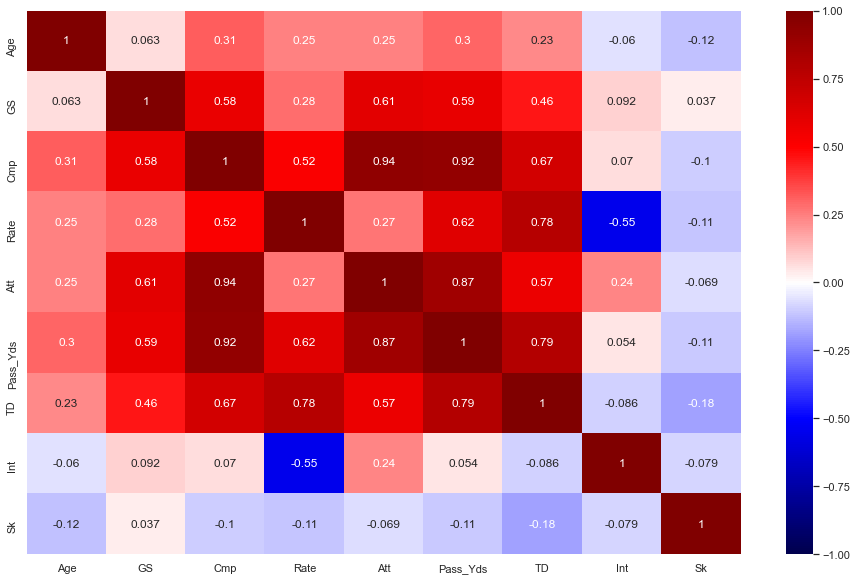

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(graph_stat_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

In [34]:
graph_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 6
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       476 non-null    int64  
 1   GS        476 non-null    int64  
 2   Cmp       476 non-null    int64  
 3   Rate      476 non-null    float64
 4   Att       476 non-null    int64  
 5   Pass_Yds  476 non-null    int64  
 6   TD        476 non-null    int64  
 7   Int       476 non-null    int64  
 8   Sk        476 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 37.2 KB


In [35]:
career_tot_df = comb_df_sel_stats.copy()

In [36]:
career_tot_df.sort_values(['name','Year'], inplace=True)
career_tot_df

,name,Year,Age,Tm,G,GS,Win,Loss,Cmp,TD%,Int%,Rate,Att,Pass_Yds,TD,Int,Sk
3,Aaron Rodgers,2008,25,GNB,16,16,6,10,341,5.2,2.4,93.8,536,4038,28,13,34
4,Aaron Rodgers,2009,26,GNB,16,16,11,5,350,5.5,1.3,103.2,541,4434,30,7,50
5,Aaron Rodgers,2010,27,GNB,15,15,10,5,312,5.9,2.3,101.2,475,3922,28,11,31
6,Aaron Rodgers,2011,28,GNB,15,15,14,1,343,9.0,1.2,122.5,502,4643,45,6,36
7,Aaron Rodgers,2012,29,GNB,16,16,11,5,371,7.1,1.4,108.0,552,4295,39,8,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Warren Moon,1991,35,HOU,16,16,11,5,404,3.5,3.2,81.7,655,4690,23,21,23
9,Warren Moon,1993,37,HOU,15,14,10,4,303,4.0,4.0,75.2,520,3485,21,21,34
10,Warren Moon,1994,38,MIN,15,15,9,6,371,3.0,3.2,79.9,601,4264,18,19,29
11,Warren Moon,1995,39,MIN,16,16,8,8,377,5.4,2.3,91.5,606,4228,33,14,38


In [37]:
cum_stats = ['name','Year','G','GS','Win','TD','Cmp','Att','Pass_Yds','Int','Sk']
career_tot_df = career_tot_df[cum_stats]
career_tot_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk
3,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34
4,Aaron Rodgers,2009,16,16,11,30,350,541,4434,7,50
5,Aaron Rodgers,2010,15,15,10,28,312,475,3922,11,31
6,Aaron Rodgers,2011,15,15,14,45,343,502,4643,6,36
7,Aaron Rodgers,2012,16,16,11,39,371,552,4295,8,51
...,...,...,...,...,...,...,...,...,...,...,...
7,Warren Moon,1991,16,16,11,23,404,655,4690,21,23
9,Warren Moon,1993,15,14,10,21,303,520,3485,21,34
10,Warren Moon,1994,15,15,9,18,371,601,4264,19,29
11,Warren Moon,1995,16,16,8,33,377,606,4228,14,38


In [38]:
car_avg_df = career_tot_df.groupby(['name','Year']).sum().groupby(level=0).cumsum().reset_index()
car_avg_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk
0,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34
1,Aaron Rodgers,2009,32,32,17,58,691,1077,8472,20,84
2,Aaron Rodgers,2010,47,47,27,86,1003,1552,12394,31,115
3,Aaron Rodgers,2011,62,62,41,131,1346,2054,17037,37,151
4,Aaron Rodgers,2012,78,78,52,170,1717,2606,21332,45,202
...,...,...,...,...,...,...,...,...,...,...,...
469,Warren Moon,1991,92,92,40,119,1761,3018,22546,107,228
470,Warren Moon,1993,107,106,50,140,2064,3538,26031,128,262
471,Warren Moon,1994,122,121,59,158,2435,4139,30295,147,291
472,Warren Moon,1995,138,137,67,191,2812,4745,34523,161,329


In [39]:
# Add back the TD stats shifted to show subsequent year TD as Y
td_df = comb_df_sel_stats[['name','Year','TD']].copy()
td_df.sort_values(by=['name','Year'], inplace=True)

In [40]:
td_df['TD'] = td_df.groupby('name')['TD'].shift(-1)

In [41]:
td_df.rename({'TD':'FY_TD'}, axis=1, inplace=True)

In [42]:
td_df

,name,Year,FY_TD
3,Aaron Rodgers,2008,30.0
4,Aaron Rodgers,2009,28.0
5,Aaron Rodgers,2010,45.0
6,Aaron Rodgers,2011,39.0
7,Aaron Rodgers,2012,38.0
...,...,...,...
7,Warren Moon,1991,21.0
9,Warren Moon,1993,18.0
10,Warren Moon,1994,33.0
11,Warren Moon,1995,25.0


In [43]:
car_avg_df = pd.merge(car_avg_df, td_df, on=['name','Year'])
car_avg_df

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk,FY_TD
0,Aaron Rodgers,2008,16,16,6,28,341,536,4038,13,34,30.0
1,Aaron Rodgers,2009,32,32,17,58,691,1077,8472,20,84,28.0
2,Aaron Rodgers,2010,47,47,27,86,1003,1552,12394,31,115,45.0
3,Aaron Rodgers,2011,62,62,41,131,1346,2054,17037,37,151,39.0
4,Aaron Rodgers,2012,78,78,52,170,1717,2606,21332,45,202,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
471,Warren Moon,1991,92,92,40,119,1761,3018,22546,107,228,21.0
472,Warren Moon,1993,107,106,50,140,2064,3538,26031,128,262,18.0
473,Warren Moon,1994,122,121,59,158,2435,4139,30295,147,291,33.0
474,Warren Moon,1995,138,137,67,191,2812,4745,34523,161,329,25.0


In [44]:
cum_avg_stats = ['Cmp','Att','TD','Pass_Yds','Int','Sk']

In [45]:
for stat in cum_avg_stats:
    car_avg_df[stat+'/gm'] = car_avg_df[stat] / car_avg_df['G']
car_avg_df['Career W %'] = car_avg_df['Win'] / car_avg_df['GS']

In [46]:
rookie_year_series = comb_df_sel_stats.groupby('name').agg({'Year':'min'})
rookie_year_series
car_avg_df['Yrs Xp'] = car_avg_df['Year']+1 - car_avg_df['name'].apply(lambda x: rookie_year_series.loc[x,'Year'])

In [47]:
car_avg_df.describe(include='all')

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk,FY_TD,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp
count,476,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,375.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
unique,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brett Favre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.178571,72.563025,72.109244,43.216387,115.460084,1483.491597,2399.886555,17450.098739,65.779412,141.151261,24.304000,19.487090,32.024759,1.453196,228.714187,0.896537,2.054830,0.571742,5.470588
std,NaN,8.937893,59.939673,59.848024,39.599487,112.752549,1340.441105,2105.053773,15711.672886,58.338826,108.465091,7.694248,2.715114,3.574756,0.386717,32.610554,0.211301,0.552485,0.134575,4.332154
min,NaN,1984.000000,13.000000,13.000000,0.000000,8.000000,129.000000,233.000000,1619.000000,4.000000,11.000000,7.000000,8.600000,15.533333,0.533333,107.933333,0.250000,0.785714,0.000000,1.000000
25%,NaN,2001.000000,30.000000,29.000000,13.000000,34.000000,505.500000,855.000000,6004.250000,22.000000,54.750000,19.000000,17.872917,29.870617,1.172507,210.127244,0.750000,1.687500,0.488689,2.000000
50%,NaN,2009.000000,48.000000,48.000000,30.000000,74.500000,1003.000000,1637.500000,11498.000000,46.000000,110.000000,24.000000,19.781250,32.625000,1.479421,230.743590,0.882236,2.018608,0.600000,4.000000
75%,NaN,2015.000000,103.000000,100.500000,62.000000,156.250000,2076.500000,3330.750000,24313.500000,90.250000,205.000000,29.000000,21.298053,34.315686,1.712704,249.818262,1.062500,2.428955,0.662206,8.000000


# 2019 is for prediction (how will my model do in 2020?)

In [48]:
main_data_set = car_avg_df[car_avg_df['Year'] < 2019]
main_data_set.dropna(inplace=True)
main_data_set.describe(include='all')

<ipython-input-48-5eb9fc4f733a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data_set.dropna(inplace=True)


,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk,FY_TD,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp
count,375,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
unique,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brett Favre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2006.178667,72.528000,72.106667,43.866667,116.992000,1484.901333,2401.632000,17505.304000,66.480000,138.538667,24.304000,19.541091,32.085255,1.479979,230.191522,0.904011,2.023924,0.581489,5.338667
std,NaN,8.936949,58.533949,58.425366,38.911092,110.767075,1308.213489,2055.692636,15335.308288,57.639985,104.702880,7.694248,2.733239,3.652951,0.386478,32.496898,0.209724,0.560860,0.132530,4.137991
min,NaN,1984.000000,13.000000,13.000000,1.000000,8.000000,129.000000,233.000000,1619.000000,4.000000,13.000000,7.000000,8.600000,15.533333,0.533333,107.933333,0.250000,0.800000,0.062500,1.000000
25%,NaN,1999.500000,30.000000,29.500000,14.000000,33.500000,502.000000,869.000000,6029.000000,24.000000,55.000000,19.000000,17.941431,30.033333,1.210591,211.839583,0.766799,1.663194,0.500000,2.000000
50%,NaN,2009.000000,48.000000,48.000000,32.000000,78.000000,1021.000000,1673.000000,12215.000000,46.000000,107.000000,24.000000,19.927083,32.672897,1.507937,232.172414,0.900000,1.982857,0.606557,4.000000
75%,NaN,2013.500000,103.000000,101.000000,62.000000,159.500000,2067.500000,3368.500000,24971.000000,93.500000,202.000000,29.000000,21.312500,34.320261,1.733333,251.805387,1.063687,2.384652,0.666667,8.000000


In [52]:
#main_data_set.to_pickle('car_avg_stats_df.pkl')

In [50]:
df_2019_pred = car_avg_df[car_avg_df['Year'] > 2018]

In [54]:
#df_2019_pred.to_pickle('2019_data_for_pred.pkl')

In [55]:
df_2019_pred

,name,Year,G,GS,Win,TD,Cmp,Att,Pass_Yds,Int,Sk,FY_TD,Cmp/gm,Att/gm,TD/gm,Pass_Yds/gm,Int/gm,Sk/gm,Career W %,Yrs Xp
9,Aaron Rodgers,2019,158,158,103,330,3531,5474,42406,71,396,NaN,22.348101,34.645570,2.088608,268.392405,0.449367,2.506329,0.651899,12
29,Andy Dalton,2019,122,122,65,183,2531,4084,29028,107,257,NaN,20.745902,33.475410,1.500000,237.934426,0.877049,2.106557,0.532787,9
31,Baker Mayfield,2019,30,29,12,49,627,1020,7552,35,65,NaN,20.900000,34.000000,1.633333,251.733333,1.166667,2.166667,0.413793,2
91,Carson Wentz,2019,45,45,27,76,1032,1654,11117,28,98,NaN,22.933333,36.755556,1.688889,247.044444,0.622222,2.177778,0.600000,4
111,Dak Prescott,2019,64,64,40,97,1363,2071,15778,36,136,NaN,21.296875,32.359375,1.515625,246.531250,0.562500,2.125000,0.625000,4
138,Derek Carr,2019,94,94,39,143,2120,3313,22793,62,171,NaN,22.553191,35.244681,1.521277,242.478723,0.659574,1.819149,0.414894,6
140,Deshaun Watson,2019,31,31,21,52,678,1000,8017,21,106,NaN,21.870968,32.258065,1.677419,258.612903,0.677419,3.419355,0.677419,2
189,Jacoby Brissett,2019,31,30,11,31,548,916,6040,13,79,NaN,17.677419,29.548387,1.000000,194.838710,0.419355,2.548387,0.366667,3
193,Jameis Winston,2019,61,61,25,102,1319,2170,16745,74,142,NaN,21.622951,35.573770,1.672131,274.508197,1.213115,2.327869,0.409836,5
196,Jared Goff,2019,47,47,33,82,1054,1664,13130,35,80,NaN,22.425532,35.404255,1.744681,279.361702,0.744681,1.702128,0.702128,3
